In [1]:
"""
This script performs data loading, exploration, regression analysis, for effective connectivity in paper
"""

from statistical_model import Study
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define frequency band order (from data_preparation.py)
FREQUENCY_BAND_ORDER = ["delta", "theta", "alpha", "beta", "gamma"]


def plot_pvalue_histogram(ax, results, title):
    """Plot p-value histogram on given axes."""
    n_bins = 40
    
    if results[1] is None or 'p-value (perm)' not in results[1].columns:
        ax.text(0.5, 0.5, 'No p-values available', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(title)
        return 0, 0
    
    p_values = results[1]['p-value (perm)'].dropna()
    n_pvalues = len(p_values)
    expected_freq = 1.0 / n_bins
    
    ax.hist(p_values, bins=n_bins, edgecolor='black', alpha=0.7,
            density=False, weights=np.ones(n_pvalues) / n_pvalues)
    ax.axhline(y=expected_freq, color='green', linestyle='-', linewidth=2,
               label=f'Expected under null = {expected_freq:.3f}')
    ax.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
    ax.set_xlabel('p-value (permutation-based)')
    ax.set_ylabel('Relative Frequency')
    ax.set_title(title)
    ax.legend(fontsize=8)
    ax.grid(axis='y', alpha=0.3)
    
    return n_pvalues, np.sum(p_values < 0.05)

In [2]:
# =============================================================================
# 1. Loading the Data
# =============================================================================
print("=" * 80)
print("1. Loading the Data")
print("=" * 80)

study = Study.load("study_merged_10000.cdb")
study2 = Study.load("study_unmerged_10000.cdb")

1. Loading the Data
Study loaded successfully from study_merged_10000.cdb
Study loaded successfully from study_unmerged_10000.cdb


In [3]:
# =============================================================================
# 2. Exploring the Data
# =============================================================================
print("\n" + "=" * 80)
print("2. Exploring the Data")
print("=" * 80)

print("\nUnmerged study summary:")
study.summary()

print("\nMerged study summary:")
study2.summary()


2. Exploring the Data

Unmerged study summary:
Study summary: 4620 measurements loaded

Nodes by label:
CEN:
       L-ITG, L-SFG, L-SUP, L-pSTG, R-IFG, R-ITG, R-SFG, R-SUP, R-pSTG
DMN:
       L-ANG, L-IFG, L-PREC, L-aSTG, L-mPFC, R-ANG, R-PREC, R-aSTG, R-mPFC
SN:
       L-ACC, L-INS, R-ACC, R-INS

Measurement conditions:
  bands: alpha, beta, delta, gamma, theta
  city: merged(Kraków,Warszawa)
  eyes: eyes closed, eyes open

Samples:
  Sample ID: merged_sample, Subjects: 107

Permutation Statistics:
  Original Mean Contrast: 0.0216
  Original Median Contrast: 0.0196
  Mean Contrast p-value: 0.2133
  Median Contrast p-value: 0.2849
  Mean Contrast 95% CI: [-0.0339, 0.0344]
  Median Contrast 95% CI: [-0.0366, 0.0364]
  Number of permutations: 10000

Merged study summary:
Study summary: 9240 measurements loaded

Nodes by label:
CEN:
       L-ITG, L-SFG, L-SUP, L-pSTG, R-IFG, R-ITG, R-SFG, R-SUP, R-pSTG
DMN:
       L-ANG, L-IFG, L-PREC, L-aSTG, L-mPFC, R-ANG, R-PREC, R-aSTG, R-mPFC
SN:
  

In [4]:
# =============================================================================
# 3. Regression Analysis
# =============================================================================
print("\n" + "=" * 80)
print("3. Regression Analysis")
print("=" * 80)

results_network_only = study.regression(
    "~ network_relation -1",
    add_network_categories=True,
    n_permutations=10000,
    band_order=FREQUENCY_BAND_ORDER
)
print(study.print_apa_format(results_network_only))


3. Regression Analysis
Calculating permutation-based statistics...
Regression Analysis Results (APA Format)
----------------------------------------
Model: contrast ~ network_relation -1

The regression model explained 0.115 of the variance, F = 74.775, p = 0.132
Note: p-values are permutation-based (permuted group)

Contrast Statistics:
Mean Contrast: 0.022, 95% CI [-0.034, 0.034], p = 0.213
Median Contrast: 0.020, 95% CI [-0.037, 0.036], p = 0.285

Regression Coefficients:
Parameter            Estimate   SE         t          p         
-------------------- ---------- ---------- ---------- ----------
network_relation[CEN→CEN] 0.012      0.024      3.127      0.654      [-0.035, 0.059]     
network_relation[CEN→DMN] 0.070      0.034      19.734     0.036   *  [0.003, 0.136]      
network_relation[CEN→SN] 0.078      0.049      14.709     0.108      [-0.018, 0.174]     
network_relation[DMN→CEN] -0.030     0.024      -8.568     0.230      [-0.076, 0.016]     
network_relation[DMN→DMN] 

In [5]:
# =============================================================================
# 4. Regression Analysis: interactions
# =============================================================================
print("\n" + "=" * 80)
print("4. Regression Analysis: interactions")
print("=" * 80)

results_network_bands = study.regression(
    "~ network_relation:bands -1",
    add_network_categories=True,
    n_permutations=10000,
    band_order=FREQUENCY_BAND_ORDER
)
print(study.print_apa_format(results_network_bands))


4. Regression Analysis: interactions
Calculating permutation-based statistics...
Regression Analysis Results (APA Format)
----------------------------------------
Model: contrast ~ network_relation:bands -1

The regression model explained 0.162 of the variance, F = 20.028, p = 0.195
Note: p-values are permutation-based (permuted group)

Contrast Statistics:
Mean Contrast: 0.022, 95% CI [-0.034, 0.034], p = 0.213
Median Contrast: 0.020, 95% CI [-0.037, 0.036], p = 0.285

Regression Coefficients:
Parameter            Estimate   SE         t          p         
-------------------- ---------- ---------- ---------- ----------
network_relation[CEN→CEN] × bands[delta] -0.011     0.026      -1.400     0.675      [-0.062, 0.039]     
network_relation[CEN→DMN] × bands[delta] 0.029      0.021      3.767      0.189      [-0.012, 0.070]     
network_relation[CEN→SN] × bands[delta] 0.057      0.028      4.892      0.053   .  [0.001, 0.112]      
network_relation[DMN→CEN] × bands[delta] -0.053     

In [6]:
# =============================================================================
# 5. Regression Analysis: full specification with interactions
# =============================================================================
print("\n" + "=" * 80)
print("5. Regression Analysis: full specification with interactions")
print("=" * 80)

results_full_merged = study.regression(
    "~ city + eyes +network_relation:bands",
    add_network_categories=True,
    n_permutations=10000,
    band_order=FREQUENCY_BAND_ORDER
)

results_full_unmerged = study2.regression(
    "~ city + eyes +network_relation:bands",
    add_network_categories=True,
    n_permutations=10000,
    band_order=FREQUENCY_BAND_ORDER
)

print(study.print_apa_format(results_full_merged))
print(study2.print_apa_format(results_full_unmerged))


5. Regression Analysis: full specification with interactions
Calculating permutation-based statistics...
Calculating permutation-based statistics...
Regression Analysis Results (APA Format)
----------------------------------------
Model: contrast ~ city + eyes +network_relation:bands

The regression model explained 0.164 of the variance, F = 19.904, p = 0.197
Note: p-values are permutation-based (permuted group)

Contrast Statistics:
Mean Contrast: 0.022, 95% CI [-0.034, 0.034], p = 0.213
Median Contrast: 0.020, 95% CI [-0.037, 0.036], p = 0.285

Regression Coefficients:
Parameter            Estimate   SE         t          p         
-------------------- ---------- ---------- ---------- ----------
Intercept            -0.006     0.025      -0.771     0.808      [-0.055, 0.042]     
eyes open            -0.010     0.011      -3.505     0.388      [-0.032, 0.011]     
theta                0.022      0.056      1.892      0.732      [-0.088, 0.132]     
alpha                0.048      0


6. Specification Curve Analysis
Specification curve for model1 with merged data...


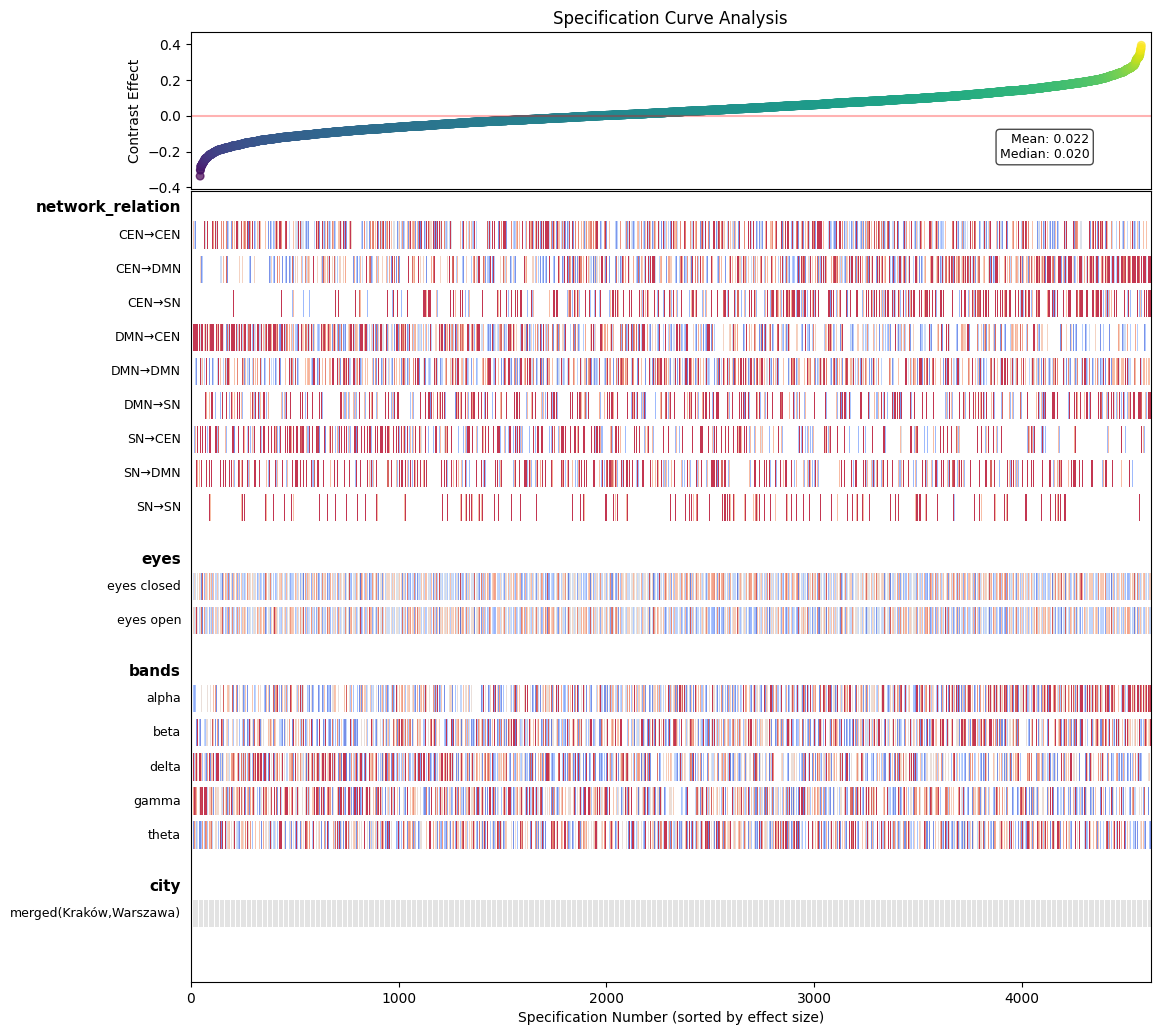

Specification curve for model2 with unmerged data...


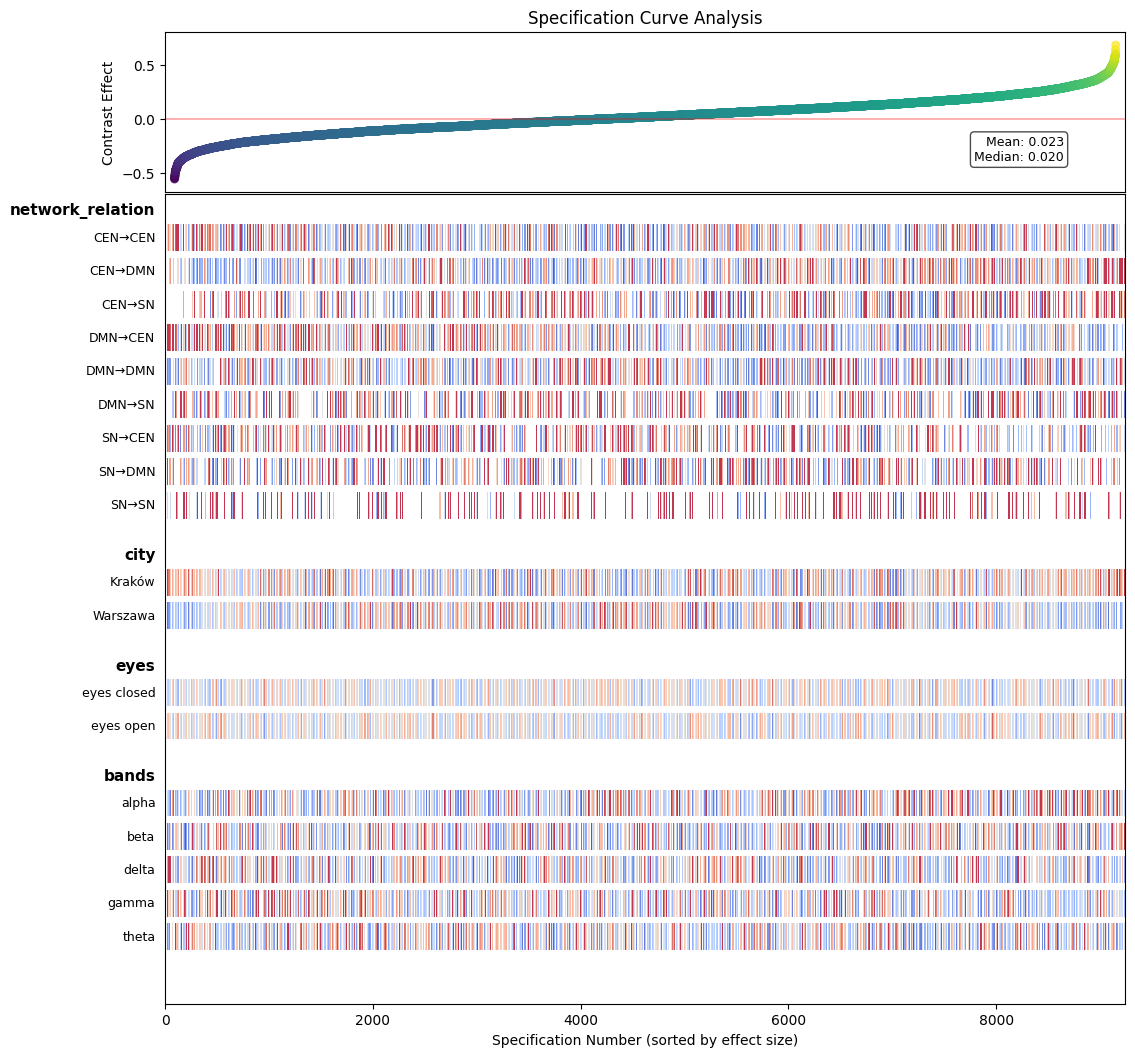

In [7]:
# =============================================================================
# 6. Specification Curve Analysis
# =============================================================================
print("\n" + "=" * 80)
print("6. Specification Curve Analysis")
print("=" * 80)

print("Specification curve for model1 with merged data...")
spec_df, results_df = study.specification_curve(add_network_categories=True, plot_type='density')

print("Specification curve for model2 with unmerged data...")
spec_df, results_df = study2.specification_curve(add_network_categories=True, plot_type='density')


7. P-Value Histograms
Model 1: 9 parameters, 1 significant at α=0.05
Model 2: 45 parameters, 3 significant at α=0.05
Model 3: 46 parameters, 6 significant at α=0.05
Model 4: 47 parameters, 5 significant at α=0.05


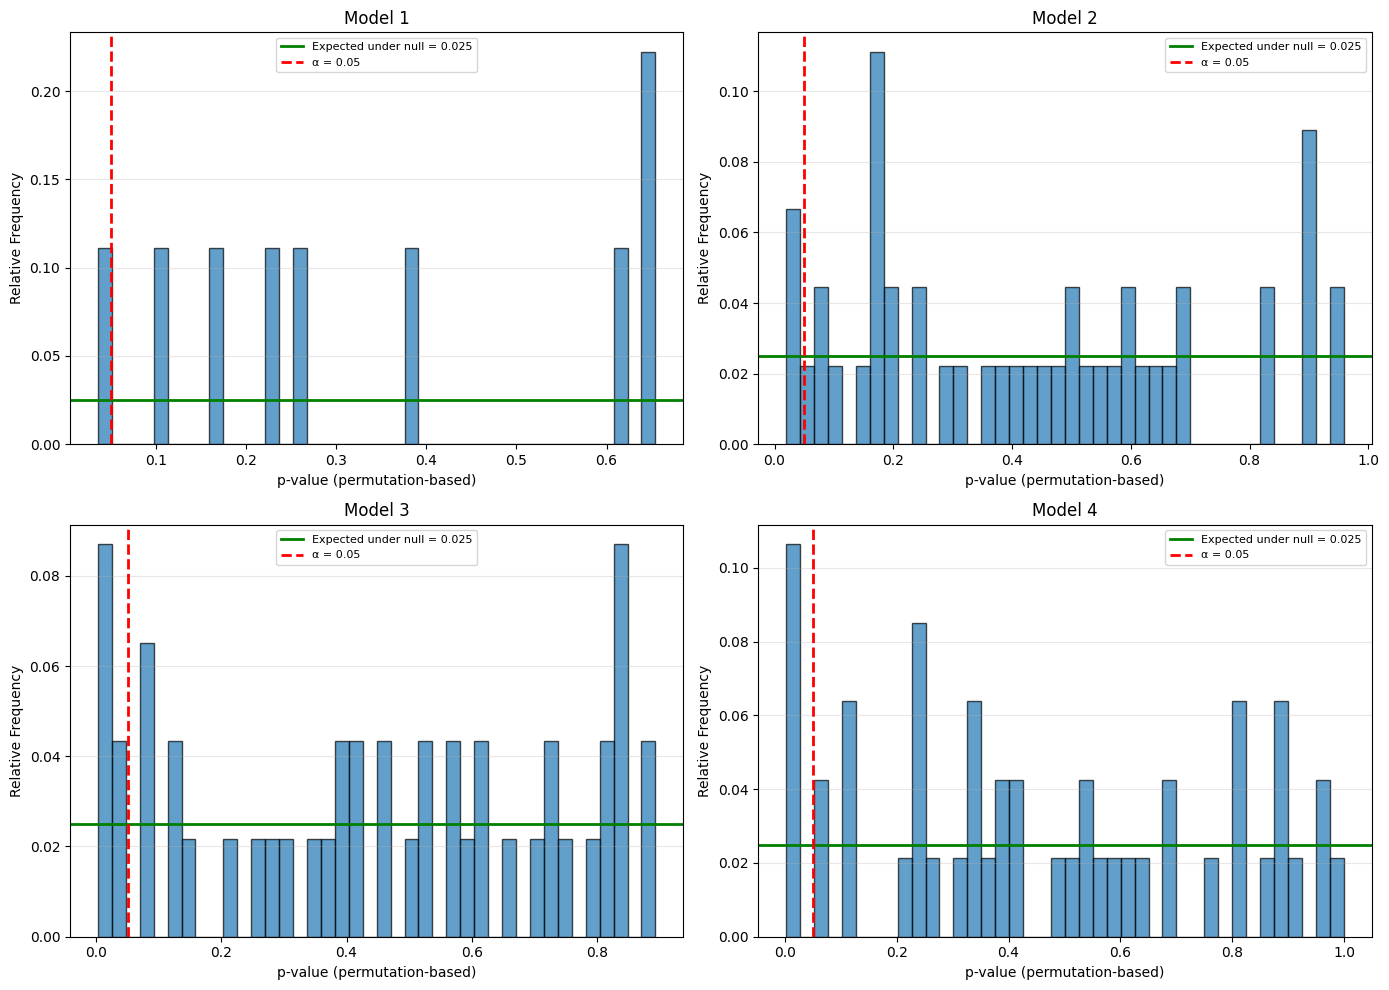

In [8]:
# =============================================================================
# 7. P-Value Histograms
# =============================================================================
print("\n" + "=" * 80)
print("7. P-Value Histograms")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

models = [
    (results_network_only, "Model 1"),
    (results_network_bands, "Model 2"),
    (results_full_merged, "Model 3"),
    (results_full_unmerged, "Model 4"),
]

for ax, (results, title) in zip(axes.flat, models):
    n_pvalues, n_sig = plot_pvalue_histogram(ax, results, title)
    if n_pvalues > 0:
        print(f"{title}: {n_pvalues} parameters, {n_sig} significant at α=0.05")

plt.tight_layout()
plt.show()